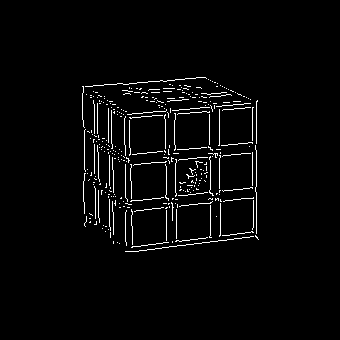

In [2]:
from PIL import Image
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def convolve3d_grayscale(image, kernel):
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0]+kernel.shape[0]-1,image.shape[1] + kernel.shape[1]-1))
    image_padded[kernel.shape[0]-2:-1:,kernel.shape[1]-2:-1:] = image
    image_padded[0,0]=image[0,0]
    image_padded[-1,-1]=image[-1,-1]
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y,x]=(kernel * image_padded[y: y+kernel.shape[0], x: x+kernel.shape[1]]).sum()
    return output

def non_max_suppression(img,D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180
    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z


def threshold(img, weak,strong,lowThresholdRatio=0.05, highThresholdRatio=0.09):
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    weak = np.int32(weak)
    strong = np.int32(strong)
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    return (res, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

from PIL import Image
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def convolve3d_grayscale(image, kernel):
    output = np.zeros_like(image)
    image_padded = np.zeros((image.shape[0]+kernel.shape[0]-1,image.shape[1] + kernel.shape[1]-1))
    image_padded[kernel.shape[0]-2:-1:,kernel.shape[1]-2:-1:] = image
    image_padded[0,0]=image[0,0]
    image_padded[-1,-1]=image[-1,-1]
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y,x]=(kernel * image_padded[y: y+kernel.shape[0], x: x+kernel.shape[1]]).sum()
    return output

def non_max_suppression(img,D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def threshold(img, weak,strong,lowThresholdRatio=0.05, highThresholdRatio=0.09):
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    weak = np.int32(weak)
    strong = np.int32(strong)
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    return (res, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img



x_direction_kernel=np.array([[-1,0,1],
                             [-2,0,2],
                             [-1,0,1]],np.float32)

y_direction_kernel=np.array([[-1,-2,-1],
                             [ 0, 0, 0],
                             [ 1, 2, 1]],np.float32)

gaussian_blur=np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]])/256


file_name="edge-detection2.jpg"
im = rgb2gray(np.array(Image.open(file_name)))


im=convolve3d_grayscale(im,gaussian_blur)
intensity_x=convolve3d_grayscale(im,x_direction_kernel)  
intensity_y=convolve3d_grayscale(im,y_direction_kernel)  
im=np.hypot(intensity_x,intensity_y)                     
im= im / im.max() * 255                                  
theta=np.arctan2(intensity_y,intensity_x)


im=non_max_suppression(im,theta)


weak=75
strong=255
canny_output=threshold(im,weak,strong,0.05,0.09)

im=hysteresis(canny_output[0],canny_output[1],canny_output[2])


pil_img=Image.fromarray(im).convert('RGB')
pil_img.save('canny.png')
Image.open('canny.png')